In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [127]:
df = pd.read_excel('player_stats_value.xlsx')
df


,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '#Players')

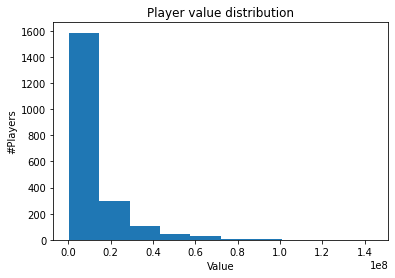

In [128]:
plt.hist(df['Value'])
plt.title(label="Player value distribution")
plt.xlabel(xlabel="Value")
plt.ylabel(ylabel="#Players")

In [129]:
df_2021_2020 = df.iloc[:, :143]
df_2021_2020

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,NaN


In [130]:
df3 = df_2021_2020.iloc[:,10:143]
df3['Age'] = df_2021_2020['Age']
df3['Contract Years Left'] = df_2021_2020['Contract Years Left']
df3['Value'] = df_2021_2020['Value']
df3['Contract Years Left'].to_csv('file.csv')

In [131]:
rslt_df = df3.loc[df3['Contract Years Left'] != 'fail']
rslt_df

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),...,Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21),Age,Contract Years Left,Value
0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,5.0,0.0,...,4.0,0.0,0.0,109.0,7.0,8.0,46.7,22,1,144000000
1,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,96.0,37.0,40.0,48.1,21,3,117000000
2,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,1.0,0.0,...,2.0,0.0,0.0,155.0,90.0,129.0,41.1,28,3,108000000
3,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,154.0,5.0,22.0,18.5,21,5,90000000
4,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.0,0.0,...,2.0,0.0,0.0,191.0,21.0,52.0,28.8,29,2,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,180000
2071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,3,135000
2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,3,90000
2073,2.0,239.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,NaN,36,1,90000


In [132]:
rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)
rslt_df.dtypes

C:\Users\camil\AppData\Local\Temp\ipykernel_33832\527357103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)


Starts (20/21)                float64
Min (20/21)                   float64
Total Mins/90 (20/21)         float64
Gls (20/21)                   float64
Ast (20/21)                   float64
                               ...   
Aerial Duel Lost (20/21)      float64
% Aerial Duels Won (20/21)    float64
Age                             int64
Contract Years Left             int32
Value                           int64
Length: 136, dtype: object

In [133]:
rslt_df.applymap(np.isreal).all(1)

0       True
1       True
2       True
3       True
4       True
        ... 
2070    True
2071    True
2072    True
2073    True
2074    True
Length: 2030, dtype: bool

In [134]:
corr = rslt_df.corr()
corr
##sb.heatmap(corr)

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),...,Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21),Age,Contract Years Left,Value
Starts (20/21),1.000000,0.992860,0.992860,0.316626,0.365920,0.314668,0.186377,0.191588,0.475768,0.130125,...,0.165243,0.228726,0.152669,0.816238,0.461555,0.450391,0.090286,0.164522,0.154264,0.337256
Min (20/21),0.992860,1.000000,0.999996,0.306045,0.356860,0.303682,0.181733,0.187110,0.469835,0.120387,...,0.153987,0.231769,0.155883,0.820763,0.469550,0.449483,0.094241,0.157246,0.162765,0.340036
Total Mins/90 (20/21),0.992860,0.999996,1.000000,0.306059,0.356779,0.303711,0.181688,0.187069,0.469768,0.120442,...,0.154087,0.231742,0.155778,0.820783,0.469528,0.449437,0.094151,0.157221,0.162878,0.339977
Gls (20/21),0.316626,0.306045,0.306059,1.000000,0.542839,0.974445,0.653881,0.662096,0.063637,-0.000661,...,0.452895,-0.118795,-0.069195,0.019618,0.213383,0.489513,-0.201898,0.051905,0.088132,0.444811
Ast (20/21),0.365920,0.356860,0.356779,0.542839,1.000000,0.527406,0.360210,0.366183,0.121058,-0.008217,...,0.293348,-0.071869,-0.073009,0.195290,0.041227,0.273091,-0.244304,0.029786,0.109474,0.446802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aerial Duel Lost (20/21),0.450391,0.449483,0.449437,0.489513,0.273091,0.499392,0.244672,0.258068,0.309617,0.078961,...,0.302109,0.032706,0.017920,0.321728,0.730862,1.000000,-0.044891,0.032690,0.092333,0.148435
% Aerial Duels Won (20/21),0.090286,0.094241,0.094151,-0.201898,-0.244304,-0.201434,-0.115675,-0.120245,0.236848,0.082919,...,-0.158926,0.200985,0.166108,0.295961,0.462543,-0.044891,1.000000,0.104925,-0.032524,-0.052993
Age,0.164522,0.157246,0.157221,0.051905,0.029786,0.031448,0.098376,0.113328,0.063478,0.015120,...,-0.043972,0.040130,0.020722,0.102696,0.076991,0.032690,0.104925,1.000000,-0.391751,-0.199550
Contract Years Left,0.154264,0.162765,0.162878,0.088132,0.109474,0.098663,0.014571,0.008388,0.051099,0.022597,...,0.041796,0.054153,0.025690,0.138690,0.073477,0.092333,-0.032524,-0.391751,1.000000,0.328123


In [135]:
corr
value_corr = corr.loc[corr['Value'] > 0]
value_corr = value_corr[['Value']]
value_corr
value_corr.style.applymap(lambda x: 'background-color : red' if x>.5 else ('background-color : orange' if x>.3 else 'background-color : green' if x>.1 else ''))

,Value
Starts (20/21),0.337256
Min (20/21),0.340036
Total Mins/90 (20/21),0.339977
Gls (20/21),0.444811
Ast (20/21),0.446802
Non-Penalty Goals (20/21),0.438059
Penalties Scored (20/21),0.275309
Penalties Attempted (20/21),0.271654
Yellow Cards (20/21),0.094952
Red Cards (20/21),0.017236


In [136]:
value_corr.nlargest(8,'Value')

,Value
Value,1.000000
Goal Creating Actions (20/21),0.518250
Total Carries in Forward Direction (20/21),0.512980
Number of Times Player was Pass Target (20/21),0.511899
Passes Leading to Goals (20/21),0.509611
Non-penalty xG+ xA (20/21),0.508318
Passes Leading to Shot Attempt (20/21),0.503195
Touches in Attacking Penalty Box (20/21),0.494847


<AxesSubplot:>

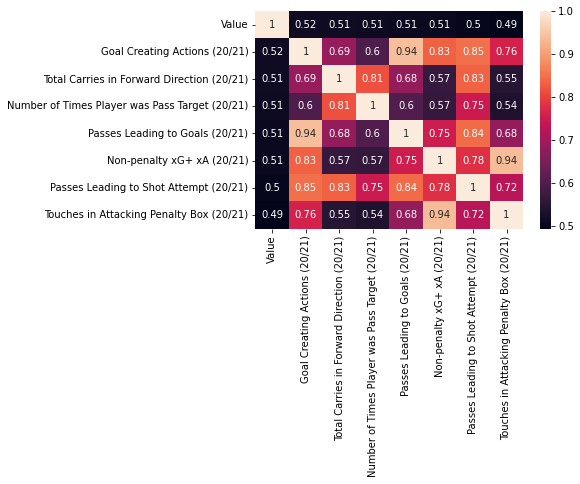

In [137]:
df3 = df[['Value','Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
df3.corr()
##print(df3.corr())
sb.heatmap(df3.corr(), annot=True)

### Cleaning rows with missing data (NaN)

In [138]:
df_reg = df3.dropna()
y=df_reg[['Value']]
x=df_reg[['Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
df_reg

,Value,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,144000000,28.0,261.0,1616.0,13.0,24.7,69.0,277.0
1,117000000,16.0,79.0,1100.0,10.0,25.9,39.0,190.0
2,108000000,25.0,150.0,1761.0,15.0,24.8,70.0,166.0
3,90000000,22.0,239.0,1693.0,17.0,13.4,87.0,134.0
4,90000000,14.0,218.0,2137.0,10.0,22.6,87.0,313.0
...,...,...,...,...,...,...,...,...
2061,225000,0.0,0.0,37.0,0.0,0.0,0.0,0.0
2062,225000,0.0,15.0,122.0,0.0,1.5,3.0,18.0
2066,225000,0.0,2.0,54.0,0.0,0.0,0.0,0.0
2069,180000,0.0,0.0,76.0,0.0,0.0,1.0,0.0


In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [140]:
X_train

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
1267,7.0,46.0,1169.0,4.0,8.6,32.0,108.0
461,5.0,104.0,1352.0,5.0,3.1,28.0,27.0
68,7.0,91.0,1140.0,7.0,6.3,34.0,68.0
975,4.0,27.0,529.0,4.0,4.5,20.0,44.0
1965,1.0,5.0,73.0,1.0,0.5,2.0,1.0
...,...,...,...,...,...,...,...
851,8.0,36.0,661.0,0.0,8.0,14.0,77.0
1251,2.0,20.0,130.0,2.0,1.4,8.0,10.0
1734,0.0,0.0,264.0,0.0,0.1,1.0,0.0
567,4.0,149.0,1800.0,4.0,2.4,47.0,41.0


In [141]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [142]:
regressor.score(X_test,Y_test)

0.39998387230166166

In [143]:
regressor.intercept_

array([524476.34060983])

In [144]:
array = regressor.coef_
array
df9 = pd.DataFrame(array)
df9= df9.transpose()
df9['coef_'] = df9[0]
df9

,0,coef_
0,3793.685932,3793.685932
1,66346.205913,66346.205913
2,6154.273795,6154.273795
3,849109.645535,849109.645535
4,664373.248826,664373.248826
5,-229258.388117,-229258.388117
6,49928.860457,49928.860457


In [145]:
df_coef = pd.DataFrame(x.columns.transpose())
df_coef['coef'] = df9['coef_']
df_coef.columns=["Variable","Coefficient"]
df_coef = df_coef.set_index(["Variable"])
df_coef

,Coefficient
Variable,
Goal Creating Actions (20/21),3793.685932
Total Carries in Forward Direction (20/21),66346.205913
Number of Times Player was Pass Target (20/21),6154.273795
Passes Leading to Goals (20/21),849109.645535
Non-penalty xG+ xA (20/21),664373.248826
Passes Leading to Shot Attempt (20/21),-229258.388117
Touches in Attacking Penalty Box (20/21),49928.860457


In [146]:
RFReg = RandomForestRegressor(n_estimators=1000,random_state=0)

RFReg.fit(X_train,Y_train)

C:\Users\camil\AppData\Local\Temp\ipykernel_33832\945952714.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [147]:
RFReg.score(X_test,Y_test)

0.3878479914087902

### Standardizing my dataframe (only top 8 correlated variables)

In [148]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
Std_data = scaler.fit_transform(df_reg)

Std_data

array([[ 8.8341642 ,  5.21490352,  3.08887236, ...,  4.93256414,
         2.22815282,  5.45902963],
       [ 7.03143181,  2.61414655,  0.11944509, ...,  5.21362192,
         0.77903409,  3.47211264],
       [ 6.43052102,  4.56471428,  1.27784803, ...,  4.95598562,
         2.27645678,  2.9239976 ],
       ...,
       [-0.76538574, -0.8535294 , -1.13685106, ..., -0.85254195,
        -1.10482026, -0.86713137],
       [-0.7683903 , -0.8535294 , -1.16948213, ..., -0.85254195,
        -1.0565163 , -0.86713137],
       [-0.7743994 , -0.8535294 , -1.16948213, ..., -0.85254195,
        -1.10482026, -0.86713137]])

In [149]:
Std_df = pd.DataFrame(Std_data)
Std_df.columns = ['Value','Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']
Std_df

,Value,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,8.834164,5.214904,3.088872,1.585359,3.229115,4.932564,2.228153,5.459030
1,7.031432,2.614147,0.119445,0.574464,2.292358,5.213622,0.779034,3.472113
2,6.430521,4.564714,1.277848,1.869428,3.853619,4.955986,2.276457,2.923998
3,5.228699,3.914525,2.729931,1.736209,4.478124,2.285937,3.097624,2.193178
4,5.228699,2.180687,2.387304,2.606049,2.292358,4.440713,3.097624,6.281202
...,...,...,...,...,...,...,...,...
1905,-0.765386,-0.853529,-1.169482,-1.508058,-0.830166,-0.852542,-1.104820,-0.867131
1906,-0.765386,-0.853529,-0.924749,-1.341534,-0.830166,-0.501220,-0.959908,-0.456045
1907,-0.765386,-0.853529,-1.136851,-1.474753,-0.830166,-0.852542,-1.104820,-0.867131
1908,-0.768390,-0.853529,-1.169482,-1.431653,-0.830166,-0.852542,-1.056516,-0.867131


In [150]:
y_std=Std_df[['Value']]
x_std=Std_df[['Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
x_std

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,5.214904,3.088872,1.585359,3.229115,4.932564,2.228153,5.459030
1,2.614147,0.119445,0.574464,2.292358,5.213622,0.779034,3.472113
2,4.564714,1.277848,1.869428,3.853619,4.955986,2.276457,2.923998
3,3.914525,2.729931,1.736209,4.478124,2.285937,3.097624,2.193178
4,2.180687,2.387304,2.606049,2.292358,4.440713,3.097624,6.281202
...,...,...,...,...,...,...,...
1905,-0.853529,-1.169482,-1.508058,-0.830166,-0.852542,-1.104820,-0.867131
1906,-0.853529,-0.924749,-1.341534,-0.830166,-0.501220,-0.959908,-0.456045
1907,-0.853529,-1.136851,-1.474753,-0.830166,-0.852542,-1.104820,-0.867131
1908,-0.853529,-1.169482,-1.431653,-0.830166,-0.852542,-1.056516,-0.867131


In [151]:
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(x_std,y_std,test_size=0.3, random_state=0)
X_train_std

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
1232,0.663579,-0.418968,0.709642,0.418843,1.161706,0.440906,1.599386
456,0.230119,0.527333,1.068157,0.731096,-0.126476,0.247691,-0.250502
68,0.663579,0.315232,0.652828,1.355600,0.623011,0.537514,0.685861
957,0.013390,-0.728963,-0.544181,0.418843,0.201425,-0.138741,0.137746
1841,-0.636800,-1.087904,-1.437530,-0.517914,-0.735435,-1.008212,-0.844293
...,...,...,...,...,...,...,...
835,0.880309,-0.582123,-0.285580,-0.830166,1.021177,-0.428565,0.891404
1216,-0.420070,-0.843171,-1.325861,-0.205662,-0.524641,-0.718389,-0.638750
1653,-0.853529,-1.169482,-1.063342,-0.830166,-0.829120,-1.056516,-0.867131
559,0.013390,1.261532,1.945833,0.418843,-0.290426,1.165466,0.069232


In [152]:
regressor_std = LinearRegression()
regressor_std.fit(X_train_std, Y_train_std)

LinearRegression()

In [153]:
regressor_std.score(X_test_std,Y_test_std)

0.39998387230166343

In [154]:
regressor_std.coef_

array([[ 0.00116872,  0.27150778,  0.20974328,  0.18156223,  0.18939358,
        -0.31689108,  0.14596834]])

### Using all of 2021-2020 cuantitative metrics

In [155]:
variables_list = value_corr.index.tolist()
variables_list 
df_all_2021_2020 = df_2021_2020[df_2021_2020.columns.intersection(variables_list)]
df_all_2021_2020 = df_all_2021_2020.replace('fail', np.nan)
df_all_2021_2020 = df_all_2021_2020.dropna()
df_all_2021_2020
##df_2021_2020

,Value,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,144000000,1.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,117000000,3.0,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,108000000,3.0,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,90000000,5.0,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,90000000,2.0,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,360000,2.0,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2049,270000,1.0,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,270000,1.0,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0
2060,270000,1.0,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,...,26.0,5.0,29.0,25.0,0.0,0.0,0.0,131.0,25.0,25.0


In [156]:
y_std =df_all_2021_2020.iloc[:,0]
x_std =df_all_2021_2020.iloc[:,1:]
x_std

,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,1.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,5.0,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,3.0,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,2.0,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,3.0,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,1.0,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,5.0,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.0,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,2.0,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.0,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2.0,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,5.0,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2049,1.0,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,4.0,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,1.0,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,2.0,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0
2060,1.0,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,0.0,...,26.0,5.0,29.0,25.0,0.0,0.0,0.0,131.0,25.0,25.0


In [157]:
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(x_std,y_std,test_size=0.3, random_state=0)
X_train_std

,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
1875,3.0,10.0,899.0,10.000000,2.0,0.0,2.0,0.0,0.0,0.0,...,15.0,1.0,4.0,4.0,0.0,1.0,0.0,67.0,5.0,11.0
1272,3.0,29.0,2551.0,28.300000,2.0,2.0,2.0,0.0,0.0,3.0,...,55.0,7.0,56.0,33.0,1.0,2.0,0.0,226.0,31.0,51.0
1004,2.0,31.0,2664.0,29.600000,2.0,1.0,2.0,0.0,0.0,3.0,...,26.0,2.0,42.0,52.0,0.0,0.0,0.0,251.0,33.0,43.0
53,2.0,31.0,2777.0,30.900000,3.0,0.0,3.0,0.0,0.0,1.0,...,28.0,0.0,3.0,27.0,0.0,0.0,0.0,260.0,38.0,35.0
883,1.0,3.0,283.0,3.100000,1.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,2.0,4.0,0.0,0.0,0.0,9.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,4.0,35.0,3140.0,34.900000,3.0,7.0,3.0,0.0,0.0,4.0,...,54.0,3.0,110.0,34.0,0.0,1.0,0.0,291.0,24.0,46.0
968,3.0,9.0,950.0,10.600000,5.0,0.0,5.0,0.0,0.0,2.0,...,20.0,4.0,8.0,6.0,1.0,0.0,0.0,50.0,8.0,24.0
1501,2.0,19.0,1480.0,16.400000,1.0,2.0,1.0,0.0,0.0,1.0,...,14.0,1.0,38.0,23.0,0.0,0.0,0.0,130.0,22.0,23.0
627,3.0,11.0,1004.0,11.155556,3.0,0.0,3.0,0.0,0.0,1.0,...,13.0,2.0,10.0,8.0,0.0,0.0,0.0,83.0,7.0,13.0


In [162]:
regressor_std = LinearRegression()
regressor_std.fit(X_train_std, Y_train_std)

LinearRegression()

In [163]:
regressor_std.score(X_test_std,Y_test_std)

0.4821546277363764

In [164]:
regressor_std.coef_

array([ 2.46688111e+06, -2.29299552e+05,  3.36637116e+05, -3.05911347e+07,
       -1.78949379e+04,  1.34135781e+05,  6.82026835e+05, -6.99921778e+05,
        5.22212521e+06, -1.87939165e+05, -6.21764326e+05, -7.97942050e+07,
       -4.36375496e+07,  2.90607177e+07,  4.02005087e+07,  1.93647685e+07,
       -5.28780616e+06,  7.27230901e+06,  7.95449317e+05, -1.48727546e+06,
        1.79450136e+08,  1.01661649e+07, -1.37830901e+08, -1.68805759e+08,
        1.31668417e+08, -4.26711927e+05,  5.43776434e+05, -4.64199426e+02,
        1.82060010e+06, -4.43378301e+06,  9.95824143e+06, -2.86088620e+06,
       -1.25563172e+05, -2.71215659e+07,  5.26991122e+06, -6.59028217e+06,
       -3.45505345e+04, -8.55398072e+05, -1.00720376e+05,  1.98941900e+05,
       -3.13802045e+05,  3.80432672e+04, -8.54831691e+04,  2.28469886e+05,
        1.20704680e+05, -5.77438611e+06,  1.06516367e+06, -1.06783178e+06,
        5.38433497e+05,  1.19751266e+06, -5.01376011e+05, -1.11119735e+06,
        1.44985513e+05,  